# Classification with AutoML (auto-sklearn)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn import datasets, metrics, model_selection, preprocessing, pipeline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import autosklearn.classification

In [2]:
wine = datasets.load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

train samples: 89
test samples 89


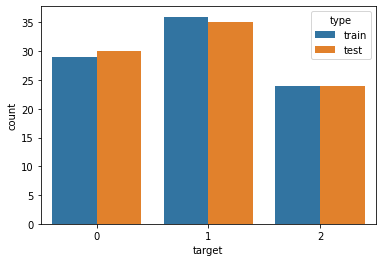

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.5, stratify=y)

df_train = pd.DataFrame(y_train, columns=['target'])
df_train['type'] = 'train'

df_test = pd.DataFrame(y_test, columns=['target'])
df_test['type'] = 'test'

df_set = df_train.append(df_test)

_ = sns.countplot(x='target', hue='type', data=df_set)     

print('train samples:', len(X_train))
print('test samples', len(X_test))

**Note:** We do some restrictions here running time and number of ensembles, because the model fitting would not take much longer. So this is just an example how you could run AutoML.

In [5]:
model = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=30, ensemble_size=3)

In [6]:
%%capture
# ignore oput from model fit with capture magic command
model.fit(X_train, y_train)

Print the final ensemble constructed by auto-sklearn

In [7]:
for m in model.get_models_with_weights():
    print(m)


(0.3333333333333333, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'random_forest', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'standardize', 'feature_preprocessor:__choice__': 'liblinear_svc_preprocessor', 'classifier:random_forest:bootstrap': 'True', 'classifier:random_forest:criterion': 'gini', 'classifier:random_forest:max_depth': 'None', 'classifier:random_forest:max_features': 0.7258011125423461, 'classifier:random_forest:max_leaf_nodes': 'None', 'classifier:random_forest:min_impurity_decrease': 0.0, 'classifier:random_forest:min_samples_leaf': 1, 'classifier:random_forest:min_samples_split': 6, 'classifier:random_forest:min_weight_fraction_leaf': 0.0, '

In [8]:
predicted = model.predict(X_test)

confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, predicted))
confusion_matrix

,0,1,2
0,30,0,0
1,0,33,2
2,0,0,24


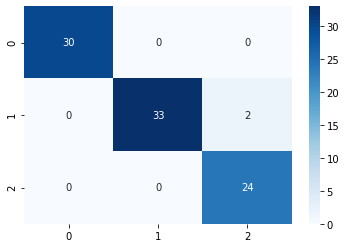

In [9]:
_ = sns.heatmap(confusion_matrix, annot=True, cmap="Blues")

In [10]:
print("accuracy: {:.3f}".format(metrics.accuracy_score(y_test, predicted)))
print("precision: {:.3f}".format(metrics.precision_score(y_test, predicted, average='weighted')))
print("recall: {:.3f}".format(metrics.recall_score(y_test, predicted, average='weighted')))
print("f1 score: {:.3f}".format(metrics.f1_score(y_test, predicted, average='weighted')))

accuracy: 0.978
precision: 0.979
recall: 0.978
f1 score: 0.978
